In [76]:
# подключаем разные библиотеки
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd
import re
from string import ascii_letters, digits
import scipy as sp
import math
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
from numpy import random
import seaborn as sns
import scipy.stats as stats


5.053


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


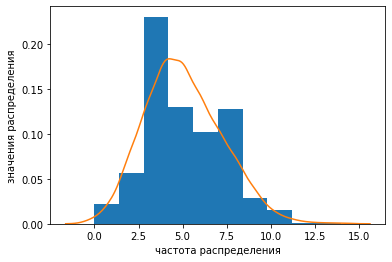

In [86]:
# генерируем Пуассоновское распределение с параметром lambda = 5

lam = 5
x = random.poisson(lam, size=1000)
count, bins, ignored = plt.hist(x, 10, density=True)
sns.distplot(x, hist=False, label='poisson')
plt.xlabel("частота распределения")
plt.ylabel("значения распределения")
plt.show()

In [65]:
# формируем набор из 1000 случайных выборок по 5, 10, 50 значений в каждой. Записываем их в матрицу.  

A = np.zeros((1000,3))
n = [5, 10, 50]

for i in range(len(n)):
    for j in range(A.shape[0]):
        index = np.random.choice(x, n[i], replace=False)
        r=np.mean(index)
        A[j,i] = r 

[[5.2  5.8  5.02]
 [5.6  5.1  4.88]
 [5.6  4.8  5.02]
 ...
 [5.6  3.9  4.96]
 [3.6  4.9  5.38]
 [6.4  4.2  5.24]]


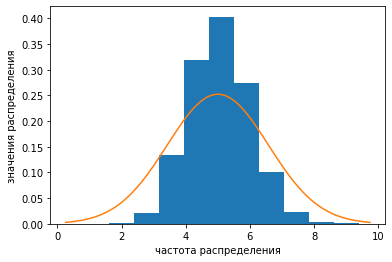

In [88]:
# для Пуассоновского распределния среднее = лямбда, дисперсия = лямбда. Значит дисперсия распределения среднего по выборке = sqrt (дисперсия / (n-1)) = sqrt (лямбда / (n-1)) 
# рисуем полученную гистограмму выборочной оценки среднего и поверх рисуем нормальное распределение с определенными выше параметрами.
# рассматриваем случай n = 5

k = 0 
count, bins, ignored = plt.hist(A[:,k], 10, density=True)
mu = lam
variance = lam / (((n[k]-1))**0.5)
sigma = math.sqrt(variance)
y = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(y, stats.norm.pdf(y, mu, sigma))
plt.xlabel("частота распределения")
plt.ylabel("значения распределения")
plt.show()

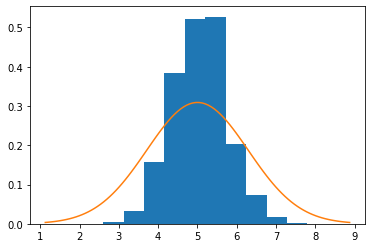

In [84]:
# для Пуассоновского распределния среднее = лямбда, дисперсия = лямбда. Значит дисперсия распределения среднего по выборке = sqrt (дисперсия / (n-1)) = sqrt (лямбда / (n-1)) 
# рисуем полученную гистограмму выборочной оценки среднего и поверх рисуем нормальное распределение с определенными выше параметрами.
# рассматриваем случай n = 10

k = 1
count, bins, ignored = plt.hist(A[:,k], 10, density=True)
mu = lam
variance = lam / (((n[k]-1))**0.5)
sigma = math.sqrt(variance)
y = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(y, stats.norm.pdf(y, mu, sigma))
plt.xlabel("частота распределения")
plt.ylabel("значения распределения")
plt.show()

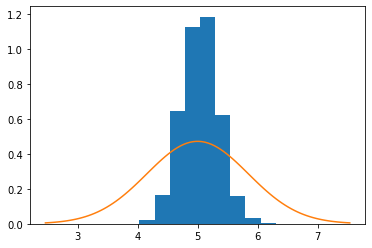

In [82]:
# для Пуассоновского распределния среднее = лямбда, дисперсия = лямбда. Значит дисперсия распределения среднего по выборке = sqrt (дисперсия / (n-1)) = sqrt (лямбда / (n-1)) 
# рисуем полученную гистограмму выборочной оценки среднего и поверх рисуем нормальное распределение с определенными выше параметрами.
# рассматриваем случай n = 50

k = 2
count, bins, ignored = plt.hist(A[:,k], 10, density=True)
mu = lam
variance = lam / (((n[k]-1))**0.5)
sigma = math.sqrt(variance)
y = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(y, stats.norm.pdf(y, mu, sigma))
plt.xlabel("частота распределения")
plt.ylabel("значения распределения")
plt.show()

Вывод: видно, что точность аппроксимации расположения среднего значения растет с числом n. При этом даже для относительно маленьких значений n  на большом количестве выборок (1000) можно достаточно легко угадать это среднее.
